# Binary Image Classification System to Identify Oil Spills in Ocean Imagery
# Group - 6 
## Suchendra Reddy Yalamakuru - 2313042
## Shreyas Mysore Narayanan - 2307777
##  Surya Vardhan Reddy Puchalapalli - 2311061
## Chinta Bindhu sri - 2316871
## Mappavarapu Madhu Sudhan Rao - 2281268
## Sreeja Reddy Nannuri - 2205712

#### Dataset Link : https://www.kaggle.com/datasets/vighneshanand/oil-spill-dataset-binary-image-classification



In [2]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.62.2-cp311-cp311-win_amd64.whl.metadata

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)


In [6]:
# importing all the required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2
import PIL
import pathlib
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG19
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D
import numpy as np
from tensorflow.keras.optimizers import RMSprop,Adam
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore") # ignore warnings

### Managing Directories

In [7]:
#getting directories of train,valid and test
folder_dir = r"C:\Users\surya\Downloads\archive\final dataset used for oil spill\dataset-final\dataset"
items = os.listdir(folder_dir)
train_dir = os.path.join(folder_dir ,items[1])
test_dir  = os.path.join(folder_dir ,items[0])
valid_dir = os.path.join(folder_dir,items[2])

In [8]:
#Function which takes directory as input and outputs image directories which are  present in input directory
def get_image_directories(directory):
    image_directories = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
                image_dir = os.path.abspath(os.path.join(root, file))
                image_directories.append(image_dir)
    return image_directories

###  Data Wrangling

In [9]:
#Converting Image dataset into  readable list
def preprocessing(directory):
    data = []
    direct = []
    height = []
    width = []
    labels = ['Non Oil Spill', 'Oil Spill']  # List of class labels to include
    for label in labels:
        d_dir = os.path.join(directory, label)
        cat = labels.index(label)
        for image in get_image_directories(d_dir):
            direct.append(image)
            img = cv2.imread(image)
            h, w, _ = img.shape
            height.append(h)
            width.append(w)
            img = cv2.resize(img, (180, 180))
            data.append([img, cat])
    return data, direct, height, width

In [10]:
#Extracting Imagedata,Imagepath,Height and width of each image from train,valid,test.
data_train , directory_train,H_train,W_train = preprocessing(train_dir)
data_valid , directory_valid,H_valid,W_valid = preprocessing(valid_dir)
data_test , directory_test,H_test,W_test   = preprocessing(test_dir)

In [11]:
print("The length of training data sapmles are ", len(data_train))
print("The length of validation data samples are ",len(data_valid))
print("The length of testing data samples are ",len(data_test))

The length of training data sapmles are  2800
The length of validation data samples are  600
The length of testing data samples are  600


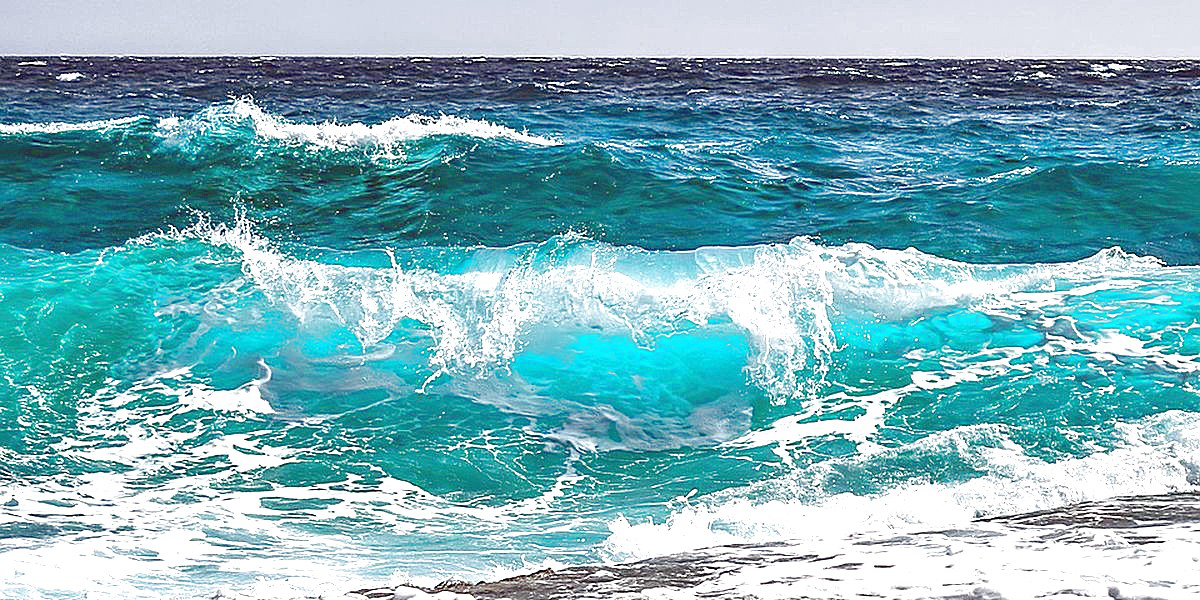

In [12]:
#Visualizing training image before resizing(NON SPILL)
PIL.Image.open(directory_train[39])

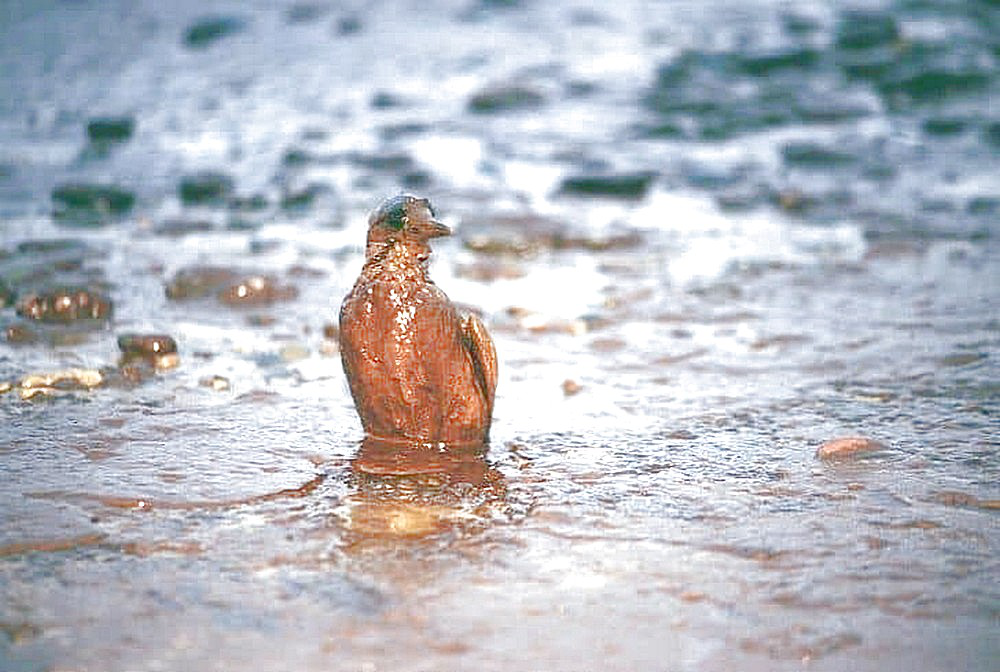

In [13]:
#Visualizing training image before resizing(SPILL)
PIL.Image.open(directory_train[1500])

## Distribution of image Heights for Training Data

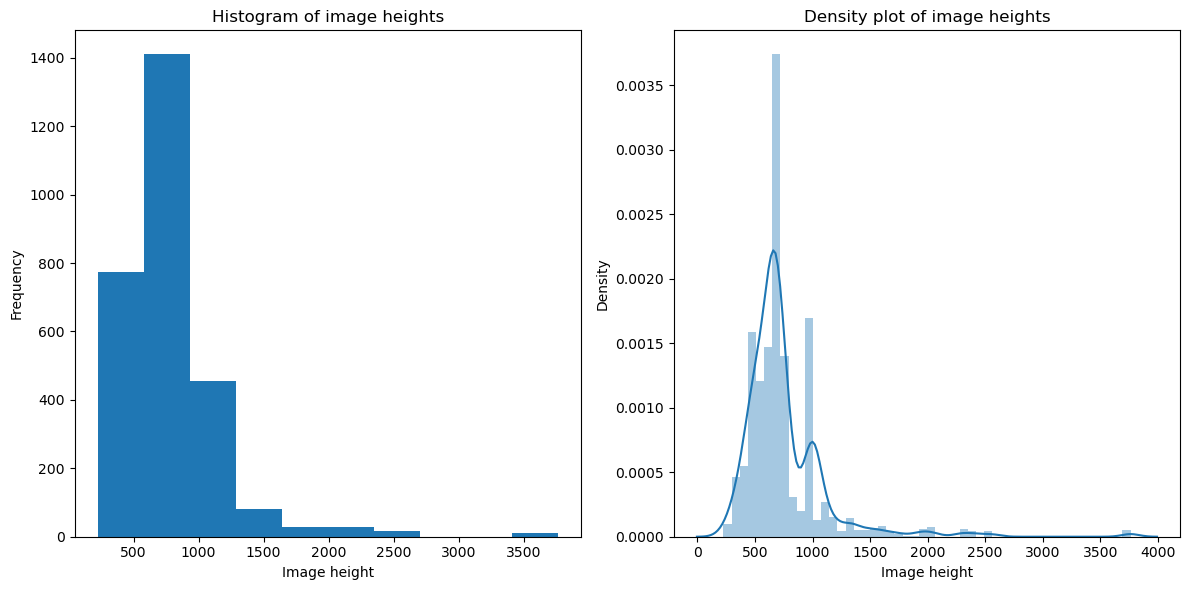

In [14]:
# create histogram using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(H_train, bins=10)
axs[0].set_xlabel('Image height')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of image heights')
# create density plot using seaborn
sns.distplot(H_train, ax=axs[1])
axs[1].set_xlabel('Image height')
axs[1].set_ylabel('Density')
axs[1].set_title('Density plot of image heights')
plt.tight_layout()
plt.show()

## Distribution of image Width for Training Data

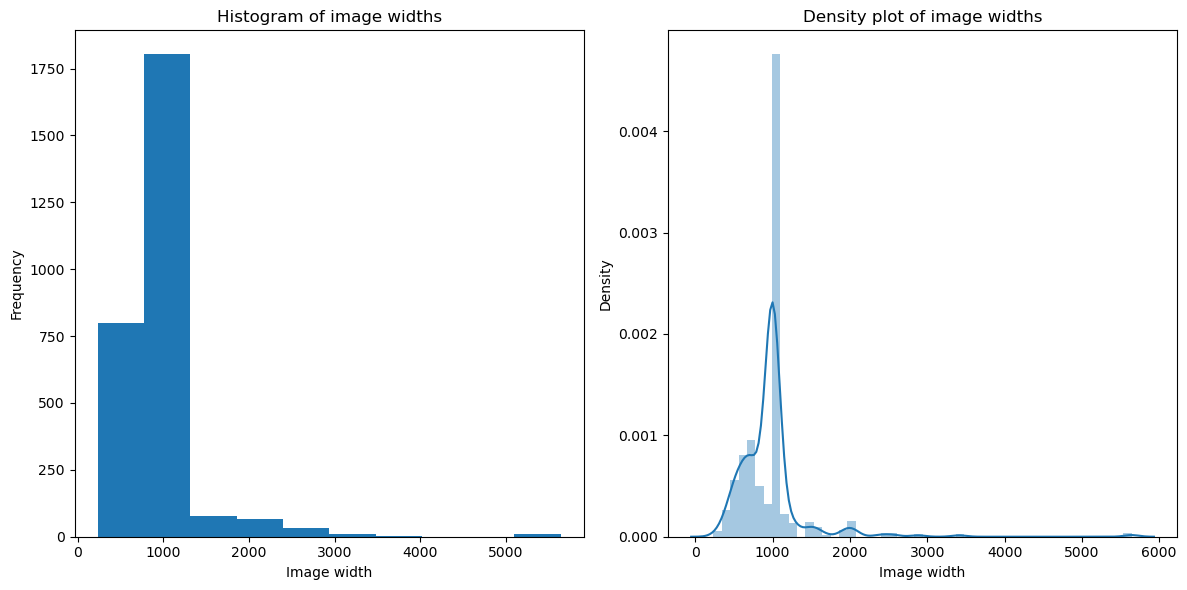

In [15]:
# create histogram using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(W_train, bins=10)
axs[0].set_xlabel('Image width')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of image widths')

# create density plot using seaborn
sns.distplot(W_train, ax=axs[1])
axs[1].set_xlabel('Image width')
axs[1].set_ylabel('Density')
axs[1].set_title('Density plot of image widths')

plt.tight_layout()
plt.show()

#### Observation
  We can observse that majority of the images have resolution  of  ~ 1000x1000.


In [16]:
#Note - Shuffling the datasets for randomization with seed 42 
import random
random.seed(42)
random.shuffle(data_train)
random.shuffle(data_valid)
random.shuffle(data_test)

In [17]:
#Extracting Features(Independent) and Labels(Dependent)
X_train =[]
y_train =[]
X_valid =[]
y_valid =[]
X_test =[]
y_test =[]
for features,label in data_train:
    X_train.append(features)
    y_train.append(label)
for features,label in data_valid:
    X_valid.append(features)
    y_valid.append(label)
for features,label in data_test:
    X_test.append(features)
    y_test.append(label)   

In [18]:
#Converting list to numpy array
X_train = np.array(X_train)
X_valid = np.array(X_valid)
X_test = np.array(X_test)
print("The training data shape is ",X_train.shape)
print("The validation data shape is ",X_valid.shape)
print("The test data shape is ",X_test.shape)

The training data shape is  (2800, 180, 180, 3)
The validation data shape is  (600, 180, 180, 3)
The test data shape is  (600, 180, 180, 3)


### Visualizing Resized images from training data

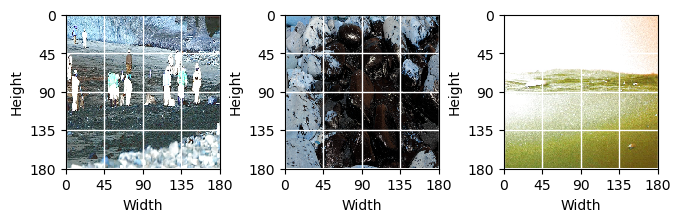

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(8, 2))

for i, ax in zip(range(0, 2401, 800), axs):
    ax.imshow(X_train[i], interpolation='nearest')
    ax.set_xticks([0, 45, 90, 135, 180])
    ax.set_yticks([0, 45, 90, 135, 180])
    ax.set_xticklabels([0, 45, 90, 135, 180])
    ax.set_yticklabels([0, 45, 90, 135, 180])
    ax.grid(color='white', linestyle='-', linewidth=1)
    ax.set_xlabel('Width')
    ax.set_ylabel('Height')
    ax.set_xlim([0, 180])
    ax.set_ylim([180, 0])

plt.show()



### Visualizing Resized images from validation data

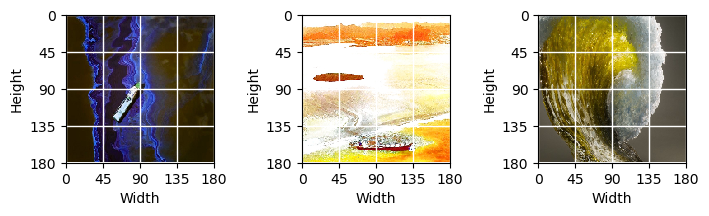

In [20]:
fig = plt.figure(figsize=(8, 2))
fig.subplots_adjust(wspace=0.6)

for i in range(0, 600, 200):
    ax = fig.add_subplot(1, 3, i//200+1)
    ax.imshow(X_valid[i], interpolation='nearest')
    ax.set_xticks([0, 45, 90, 135, 180])
    ax.set_yticks([0, 45, 90, 135, 180])
    ax.set_xticklabels([0, 45, 90, 135, 180])
    ax.set_yticklabels([0, 45, 90, 135, 180])
    ax.grid(color='white', linestyle='-', linewidth=1)
    ax.set_xlabel('Width')
    ax.set_ylabel('Height')
    ax.set_xlim([0, 180])
    ax.set_ylim([180, 0])

plt.show()


### Visualizing Resized images from testing data

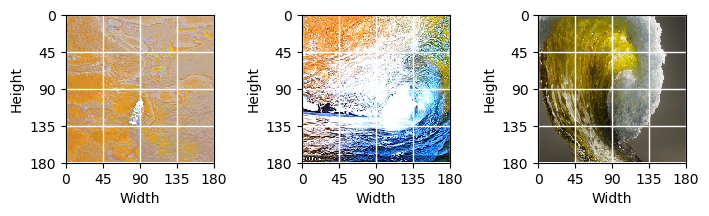

In [21]:
fig, axes = plt.subplots(ncols=3, figsize=(8, 2))
fig.subplots_adjust(wspace=0.6)
for i, ax in zip(range(0, 600, 200), axes):
    ax.imshow(X_test[i], interpolation='nearest')
    ax.set_xticks([0, 45, 90, 135, 180])
    ax.set_yticks([0, 45, 90, 135, 180])
    ax.set_xticklabels([0, 45, 90, 135, 180])
    ax.set_yticklabels([0, 45, 90, 135, 180])
    ax.grid(color='white', linestyle='-', linewidth=1)
    ax.set_xlabel('Width')
    ax.set_ylabel('Height')
    ax.set_xlim([0, 180])
    ax.set_ylim([180, 0])

plt.show()


### Preprocessing

In [22]:
# Scaling  the data and reshaping
x_train = np.array(X_train) / 255
x_val = np.array(X_valid) / 255
x_test=np.array(X_test)/255

x_train.reshape(-1, 180,180,3)
y_train = np.array(y_train)

x_val.reshape(-1, 180,180,3)
y_val = np.array(y_valid)

x_test.reshape(-1, 180,180,3)
y_test = np.array(y_test)

In [23]:
# shape of train,test and validation data
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)
print("x_val:",x_val.shape)
print("y_val:",y_val.shape)

x_train: (2800, 180, 180, 3)
y_train: (2800,)
x_test: (600, 180, 180, 3)
y_test: (600,)
x_val: (600, 180, 180, 3)
y_val: (600,)


## Model-1 CNN(VGG-19)

In [24]:
#Data Augmentation
#performing Data Augmentation on the train,test and validation data
datagen = ImageDataGenerator(
       featurewise_center=False,  # set input mean to 0 over the dataset
      samplewise_center=False,  # set each sample mean to 0
       featurewise_std_normalization=False,  # divide inputs by std of the dataset
       samplewise_std_normalization=False,  # divide each input by its std
       zca_whitening=False,  # apply ZCA whitening
      rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
      width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
       horizontal_flip = True,  # randomly flip images vertical_flip=False)  # randomly flip images
)
datagen.fit(x_train)
datagen.fit(x_val)
datagen.fit(x_test)

### Model Building

In [25]:
# using the pretrained "imagenet" weights which is trained on 1 milllion images
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(180,180,3))
for layer in vgg19.layers[:19]:
    layer.trainable = False  # freezing the weights on the lower layers og the network
    
model = Sequential()
model.add(vgg19) #adding pre-trained VGG19 model to the new sequential model.
model.add(MaxPool2D((2,2),strides=2)) #adding max pooling layer to the model,
model.add(Flatten()) #flatten it into a 1D tensor.
model.add(Dense(2,activation='sigmoid')) #fully connected layer with sigmoid activation function
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ ?                           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 4,719,616 (18.00 MB)

 Non-trainable params: 15,304,768 (58.38 MB)

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Using the updated parameter name for learning rate
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Setting up the ReduceLROnPlateau callback
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1,
                                            factor=0.3, 
                                            min_lr=0.000001)


In [27]:
#Fitting the model
history = model.fit(x_train,y_train,epochs =5  , validation_data = (x_val, y_val),shuffle=True,batch_size=64)

Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.6855 - loss: 0.7999 - val_accuracy: 0.9600 - val_loss: 0.1190
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 158s 4s/step - accuracy: 0.9678 - loss: 0.1035 - val_accuracy: 0.9650 - val_loss: 0.1010
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 181s 4s/step - accuracy: 0.9956 - loss: 0.0199 - val_accuracy: 0.9933 - val_loss: 0.0276
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 178s 4s/step - accuracy: 0.9997 - loss: 0.0032 - val_accuracy: 0.9967 - val_loss: 0.0109
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 1.0000 - loss: 9.4984e-04 - val_accuracy: 0.9967 - val_loss: 0.0104


#### Model Evaluation

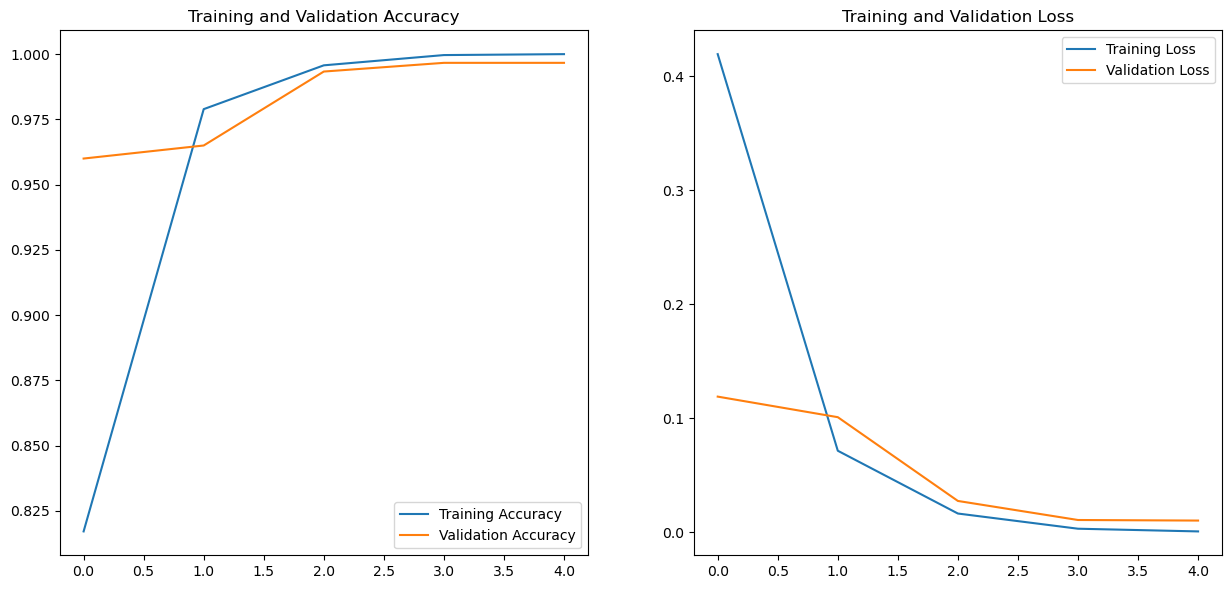

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(5)
#Comparing Train and valid Accuracy
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(2, 2, 2)
#Comparing Train and valid loss
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
#Predicting model output for validation data
y_pred_valid = model.predict(x_val)

19/19 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step


In [30]:
#Model Evaluation using confusion matrix

pred = np.argmax(y_pred_valid, axis=1)
pred = pred.reshape(1, -1)[0]
report = classification_report(y_valid, pred, target_names=['Non Oil Spill(Class 0)', 'Oil Spill (Class 1)'])
print("VGGMODEL-validation data")
print(report)

VGGMODEL-validation data
                        precision    recall  f1-score   support

Non Oil Spill(Class 0)       0.99      1.00      1.00       300
   Oil Spill (Class 1)       1.00      0.99      1.00       300

              accuracy                           1.00       600
             macro avg       1.00      1.00      1.00       600
          weighted avg       1.00      1.00      1.00       600



In [31]:
result_list = []
accuracy = accuracy_score(y_valid, pred)
result_list.append([accuracy,"vgg-19"])

---

## Model - 2 SVC(Non-linear Kernel)

In [32]:
X_train_flat = x_train.reshape(X_train.shape[0], -1)
X_valid_flat = x_val.reshape(X_valid.shape[0], -1)
X_test_flat = x_test.reshape(X_test.shape[0], -1)

In [33]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale') #svc model building

In [34]:
# Train the SVM model
svm_model.fit(X_train_flat, y_train)

SVC()

In [35]:
# Predict the labels for validation data
y_valid_pred = svm_model.predict(X_valid_flat)

In [36]:
#Model Evaluation with classification report
print("Svm_Non-Linear-Validation Data:")
print(classification_report(y_valid, y_valid_pred, target_names=['Non Spil Oil(Class 0)', 'Oil Spill(Class 1)']))

Svm_Non-Linear-Validation Data:
                       precision    recall  f1-score   support

Non Spil Oil(Class 0)       0.88      0.98      0.93       300
   Oil Spill(Class 1)       0.98      0.86      0.92       300

             accuracy                           0.92       600
            macro avg       0.93      0.92      0.92       600
         weighted avg       0.93      0.92      0.92       600



In [37]:
accuracy = accuracy_score(y_valid, y_valid_pred)
result_list.append([accuracy,"SVC_rbf"])

---

## Model - 3 SVC(linear)

In [38]:
svm_model_linear = SVC(kernel='linear')
svm_model_linear.fit(X_train_flat, y_train)

SVC(kernel='linear')

In [39]:
# Predict the labels for validation data
y_valid_pred = svm_model_linear.predict(X_valid_flat)
print("Svm-Linear-Validation Data:")
print(classification_report(y_valid, y_valid_pred, target_names=['Non Spil Oil(Class 0)', 'Oil Spill(Class 1)']))

Svm-Linear-Validation Data:
                       precision    recall  f1-score   support

Non Spil Oil(Class 0)       1.00      1.00      1.00       300
   Oil Spill(Class 1)       1.00      1.00      1.00       300

             accuracy                           1.00       600
            macro avg       1.00      1.00      1.00       600
         weighted avg       1.00      1.00      1.00       600



In [40]:
accuracy = accuracy_score(y_valid, y_valid_pred)
result_list.append([accuracy,"SVC_linear"])

---

## Model - 4 Logistic Regression

In [41]:
# Create a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_flat, y_train)

LogisticRegression()

In [42]:
# Predict the labels for validation data
y_valid_pred = logreg_model.predict(X_valid_flat)
print("Logistic_Regression-Validation Data:")
print(classification_report(y_valid, y_valid_pred, target_names=['Non Spill Oil(Class 0)', 'Spill Oil(Class 1)']))  


Logistic_Regression-Validation Data:
                        precision    recall  f1-score   support

Non Spill Oil(Class 0)       1.00      1.00      1.00       300
    Spill Oil(Class 1)       1.00      1.00      1.00       300

              accuracy                           1.00       600
             macro avg       1.00      1.00      1.00       600
          weighted avg       1.00      1.00      1.00       600



In [43]:
accuracy = accuracy_score(y_valid, y_valid_pred)
result_list.append([accuracy,"log_reg"])

---

## Model - 5 Random Forest

In [44]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_flat, y_train)

RandomForestClassifier()

In [45]:
# Predict the labels for validation data
y_valid_pred = rf_model.predict(X_valid_flat)
print("Random_Forest-Validation Data:")
print(classification_report(y_valid, y_valid_pred, target_names=['Non Spill Oil(Class 0)', 'Spill Oil(Class 1)']))  

Random_Forest-Validation Data:
                        precision    recall  f1-score   support

Non Spill Oil(Class 0)       0.79      0.96      0.87       300
    Spill Oil(Class 1)       0.95      0.75      0.83       300

              accuracy                           0.85       600
             macro avg       0.87      0.85      0.85       600
          weighted avg       0.87      0.85      0.85       600



In [46]:
accuracy = accuracy_score(y_valid, y_valid_pred)
result_list.append([accuracy,"rf"])

---

## Model -6 GradientBoostingClassifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_flat, y_train)

GradientBoostingClassifier()

In [49]:
# Make predictions and evaluate
y_valid_pred = gb_model.predict(X_valid_flat)
print(" Gradient_boosting Classifier_Validation Data:")
print(classification_report(y_valid, y_valid_pred, target_names=['Non Spill Oil(Class 0)', 'Spill Oil(Class 1)']))

 Gradient_boosting Classifier_Validation Data:
                        precision    recall  f1-score   support

Non Spill Oil(Class 0)       0.79      0.97      0.87       300
    Spill Oil(Class 1)       0.96      0.74      0.84       300

              accuracy                           0.85       600
             macro avg       0.87      0.85      0.85       600
          weighted avg       0.87      0.85      0.85       600



In [50]:
accuracy = accuracy_score(y_valid, y_valid_pred)
result_list.append([accuracy,"gb"])

---

## Model -7 GradientBoostingClassifier

In [51]:
from xgboost import XGBClassifier

In [52]:
#building xgb model
xgb_model = XGBClassifier()
xgb_model.fit(X_train_flat, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
# Make predictions and evaluate
y_valid_pred = xgb_model.predict(X_valid_flat)
print("Extreme_gradient_Validation Data:")
print(classification_report(y_valid, y_valid_pred, target_names=['Non Spill Oil(Class 0)', 'Spill Oil(Class 1)']))

Extreme_gradient_Validation Data:
                        precision    recall  f1-score   support

Non Spill Oil(Class 0)       0.80      0.98      0.88       300
    Spill Oil(Class 1)       0.97      0.76      0.85       300

              accuracy                           0.87       600
             macro avg       0.89      0.87      0.87       600
          weighted avg       0.89      0.87      0.87       600



In [54]:
accuracy = accuracy_score(y_valid, y_valid_pred)
result_list.append([accuracy,"Xgb"])

## Model Selection

In [55]:
#comparing accuracy of different models
df = pd.DataFrame(result_list, columns=['Accuracy', 'Model'])
df['Accuracy'] = df['Accuracy'].round(2)
df

Accuracy       Model
0      1.00      vgg-19
1      0.92     SVC_rbf
2      1.00  SVC_linear
3      1.00     log_reg
4      0.85          rf
5      0.86          gb
6      0.87         Xgb

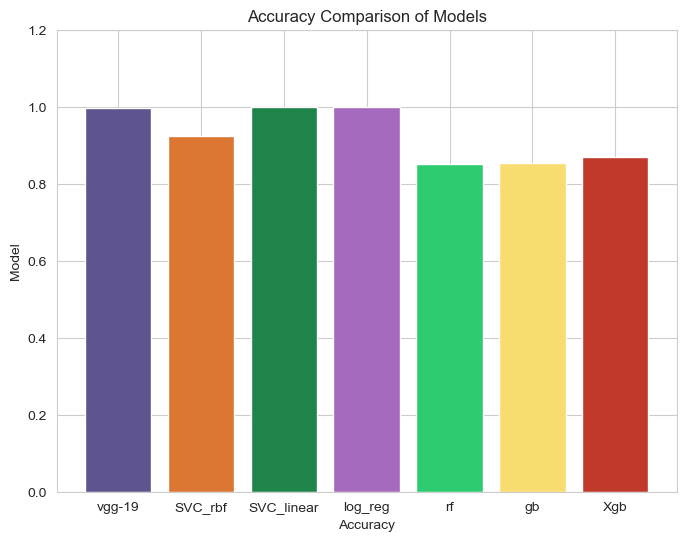

In [56]:
sns.set_style("whitegrid")
accuracy = [item[0] for item in result_list]
models = [item[1] for item in result_list]
colors = ['#5E548E', '#DC7633', '#1E8449', '#A569BD', '#2ECC71', '#F7DC6F', '#C0392B']
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=colors)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Comparison of Models')
plt.ylim(0,1.2)
plt.show()


#### Observation :
From the above result we can observe that three out of seven models have reached maximum performance on validation data .They are VGG-19, Logistic Regression and SVM_linear.

## Performance Evaluation of selected models from test data

In [57]:
# Predict the labels for Test data for SVM_linear
accuracy_test = []
y_test_pred = svm_model_linear.predict(X_test_flat)
print("SVM_LINEAR-Test Data:")
print(classification_report(y_test, y_test_pred, target_names=['Non Spil Oil(Class 0)', 'Oil Spill(Class 1)']))

SVM_LINEAR-Test Data:
                       precision    recall  f1-score   support

Non Spil Oil(Class 0)       1.00      1.00      1.00       300
   Oil Spill(Class 1)       1.00      1.00      1.00       300

             accuracy                           1.00       600
            macro avg       1.00      1.00      1.00       600
         weighted avg       1.00      1.00      1.00       600



In [58]:
accuracy = accuracy_score(y_test, y_test_pred)
accuracy_test.append([accuracy,"SVC_linear"])

In [59]:
# Predict the labels for Test data for Logistic regression
y_test_pred = logreg_model.predict(X_test_flat)
print("LOGISTIC REGRESSION-Test Data:")
print(classification_report(y_test, y_test_pred, target_names=['Non Spil Oil(Class 0)', 'Oil Spill(Class 1)']))

LOGISTIC REGRESSION-Test Data:
                       precision    recall  f1-score   support

Non Spil Oil(Class 0)       1.00      1.00      1.00       300
   Oil Spill(Class 1)       1.00      1.00      1.00       300

             accuracy                           1.00       600
            macro avg       1.00      1.00      1.00       600
         weighted avg       1.00      1.00      1.00       600



In [60]:
accuracy = accuracy_score(y_test, y_test_pred)
accuracy_test.append([accuracy,"Log_reg"])

In [61]:
#Prediction for vgg model
predictions = model.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step


In [62]:
pred = np.argmax(predictions, axis=1)
pred = pred.reshape(1, -1)[0]
report = classification_report(y_test, pred, target_names=['Non Oil Spill(Class 0)', 'Oil Spill (Class 1)'])
print("VGG_19-Test data")
print(report)

VGG_19-Test data
                        precision    recall  f1-score   support

Non Oil Spill(Class 0)       0.99      1.00      0.99       300
   Oil Spill (Class 1)       1.00      0.99      0.99       300

              accuracy                           0.99       600
             macro avg       0.99      0.99      0.99       600
          weighted avg       0.99      0.99      0.99       600



In [63]:
accuracy = accuracy_score(y_test, pred)
accuracy_test.append([accuracy,"vgg-19"])

## Final Results

In [64]:
#comparing accuracy of different models
df = pd.DataFrame(accuracy_test, columns=['Accuracy', 'Model'])
df['Accuracy'] = df['Accuracy'].round(2)
df

Accuracy       Model
0      1.00  SVC_linear
1      1.00     Log_reg
2      0.99      vgg-19